In [4]:
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
import requests

In [1]:
# get station data
stations = requests.get('https://api.ust.is/aq/a/getStations').json()

/home/stuart/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [8]:
df = pd.DataFrame.from_dict(stations)

In [17]:
df['parameters'] = df['parameters'].apply(lambda x: x.replace('{','').replace('}','').replace('"','').split(','))

In [19]:
df = pd.concat([df.drop('parameters', axis=1),
                df['parameters'].apply(lambda x: pd.Series({item: 1 for item in x}))],
               axis=1)

In [23]:
df.to_csv('raw_data/station_data.csv', index=False)

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob("raw_data/ust_aq_timeseries_*.csv")))

In [3]:
df.shape

(3579470, 10)

In [4]:
df.describe()

,the_value,verification,validity
count,3.122794e+06,3.579470e+06,3.579470e+06
mean,-1.075389e+03,1.012601e+00,8.011136e-01
std,1.040229e+05,1.582524e-01,5.985124e-01
min,-9.999010e+06,1.000000e+00,-1.000000e+00
25%,3.118330e-01,1.000000e+00,1.000000e+00
50%,1.466670e+00,1.000000e+00,1.000000e+00
75%,4.911950e+00,1.000000e+00,1.000000e+00
max,9.740000e+05,3.000000e+00,1.000000e+00


In [5]:
df.head()

,station_name,pollutantnotation,local_id,endtime,the_value,resolution,verification,validity,station_local_id,concentration
0,PCC suður,SO2,OBP-IS0050A_00001_100,2018-08-25 12:00:00,0.228191,1h,1,1,STA-IS0050A,µg/m3
1,Grundartangi Gröf,NO,OBP-IS0041A_00038_100,2018-08-25 12:00:00,-0.205167,1h,1,1,STA-IS0041A,µg/m3
2,PCC suður,NOX as NO2,OBP-IS0050A_00009_100,2018-08-25 12:00:00,4.951490,1h,1,1,STA-IS0050A,µg/m3
3,Kópavogur Dalsmári,NO,OBP-IS0037A_00038_100,2018-08-25 12:00:00,NaN,1h,1,-1,STA-IS0037A,µg/m3
4,PCC norður,NO,OBP-IS0049A_00038_100,2018-08-25 12:00:00,0.187056,1h,1,1,STA-IS0049A,µg/m3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3579470 entries, 0 to 748196
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   station_name       object 
 1   pollutantnotation  object 
 2   local_id           object 
 3   endtime            object 
 4   the_value          float64
 5   resolution         object 
 6   verification       int64  
 7   validity           int64  
 8   station_local_id   object 
 9   concentration      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 300.4+ MB


In [7]:
# create new date and time columns

In [8]:
# Convert column to datetime type
df['datetime'] = pd.to_datetime(df['endtime'])  

# Create new columns for date and time
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.time

In [9]:
df.head(5)

,station_name,pollutantnotation,local_id,endtime,the_value,resolution,verification,validity,station_local_id,concentration,datetime,date,hour
0,PCC suður,SO2,OBP-IS0050A_00001_100,2018-08-25 12:00:00,0.228191,1h,1,1,STA-IS0050A,µg/m3,2018-08-25 12:00:00,2018-08-25,12:00:00
1,Grundartangi Gröf,NO,OBP-IS0041A_00038_100,2018-08-25 12:00:00,-0.205167,1h,1,1,STA-IS0041A,µg/m3,2018-08-25 12:00:00,2018-08-25,12:00:00
2,PCC suður,NOX as NO2,OBP-IS0050A_00009_100,2018-08-25 12:00:00,4.951490,1h,1,1,STA-IS0050A,µg/m3,2018-08-25 12:00:00,2018-08-25,12:00:00
3,Kópavogur Dalsmári,NO,OBP-IS0037A_00038_100,2018-08-25 12:00:00,NaN,1h,1,-1,STA-IS0037A,µg/m3,2018-08-25 12:00:00,2018-08-25,12:00:00
4,PCC norður,NO,OBP-IS0049A_00038_100,2018-08-25 12:00:00,0.187056,1h,1,1,STA-IS0049A,µg/m3,2018-08-25 12:00:00,2018-08-25,12:00:00


In [10]:
pcc_df = df[df['station_local_id'] == 'STA-IS0050A']

In [11]:
pcc_df = pcc_df[pcc_df['pollutantnotation'] == 'SO2']

In [21]:
pcc_df = pcc_df[pcc_df['hour'] == datetime.time(12, 0)]

In [24]:
pcc_df.isna().sum(axis=0)

station_name          0
pollutantnotation     0
local_id              0
endtime               0
the_value            54
resolution            0
verification          0
validity              0
station_local_id      0
concentration         0
datetime              0
date                  0
hour                  0
dtype: int64

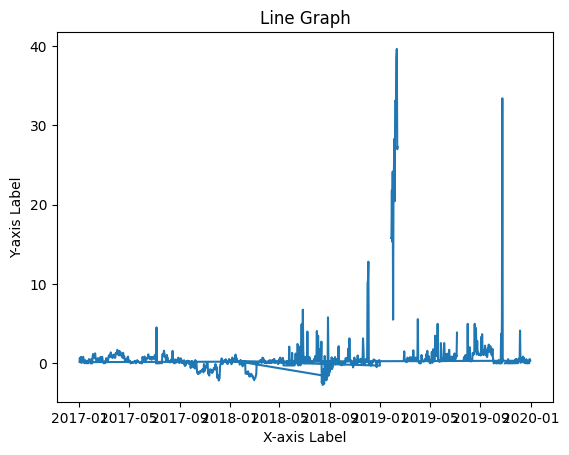

In [22]:
# Create line graph
plt.plot(pcc_df['date'], pcc_df['the_value'])

# Customize the graph
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Graph')

# Display the graph
plt.show()